In [0]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 2000
embedding_dim=16
max_length=120
trunc_type='post'
padding_type='post'
oov_tok="<OOV>"
train_size = 20000

dataset=[]
with open("sarcasm.json", 'r') as f:
  for line in f:
    dataset.append(json.loads(line))

sentences=[]
labels=[]
urls=[]
for x in dataset:
  urls.append(x['article_link'])
  sentences.append(x['headline'])
  labels.append(x['is_sarcastic'])
  
training_sentences = sentences[0:train_size]
testing_sentences = sentences[train_size:]
training_labels = labels[0:train_size]
testing_labels = labels[train_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index= tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(24, activation= 'relu'),
  tf.keras.layers.Dense(1, activation= 'sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 120, 16)           32000     
_________________________________________________________________
global_average_pooling1d_11  (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 25        
Total params: 32,433
Trainable params: 32,433
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs=30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 3s - loss: 0.6763 - acc: 0.5691 - val_loss: 0.6353 - val_acc: 0.6603
Epoch 2/30
20000/20000 - 3s - loss: 0.5039 - acc: 0.7728 - val_loss: 0.4277 - val_acc: 0.8067
Epoch 3/30
20000/20000 - 3s - loss: 0.3827 - acc: 0.8320 - val_loss: 0.4048 - val_acc: 0.8094
Epoch 4/30
20000/20000 - 3s - loss: 0.3493 - acc: 0.8462 - val_loss: 0.3842 - val_acc: 0.8287
Epoch 5/30
20000/20000 - 3s - loss: 0.3331 - acc: 0.8555 - val_loss: 0.3723 - val_acc: 0.8341
Epoch 6/30
20000/20000 - 3s - loss: 0.3201 - acc: 0.8601 - val_loss: 0.3707 - val_acc: 0.8332
Epoch 7/30
20000/20000 - 3s - loss: 0.3123 - acc: 0.8645 - val_loss: 0.3794 - val_acc: 0.8247
Epoch 8/30
20000/20000 - 3s - loss: 0.3069 - acc: 0.8652 - val_loss: 0.3726 - val_acc: 0.8292
Epoch 9/30
20000/20000 - 3s - loss: 0.3009 - acc: 0.8686 - val_loss: 0.3824 - val_acc: 0.8244
Epoch 10/30
20000/20000 - 3s - loss: 0.2981 - acc: 0.8702 - val_loss: 0.3798 - val_acc: 0.8274
Epoch 11/3

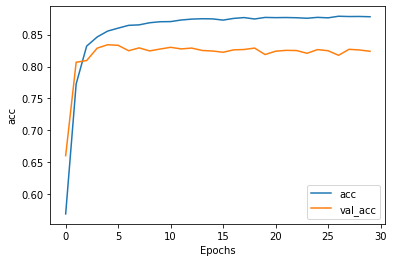

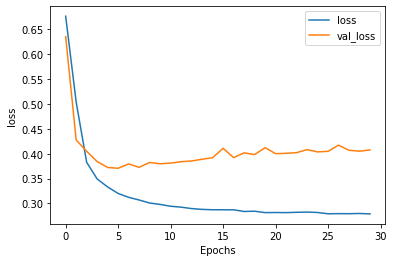

In [0]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "acc")
plot_graphs(history, "loss")